

# Gender Recognition by Voice

From the description file at https://data.world/ml-research/gender-recognition-by-voice:

In order to analyze gender by voice and speech, a training database was required. A database was built using thousands of samples of male and female voices, each labeled by their gender of male or female. Voice samples were collected from the following resources:

*  [The Harvard-Haskins Database of Regularly-Timed Speech](http://nsi.wegall.net/)
*  Telecommunications & Signal Processing Laboratory (TSP) Speech Database at McGill University
*  [VoxForge Speech Corpus](http://www.repository.voxforge1.org/downloads/SpeechCorpus/Trunk/Audio/Main/8kHz_16bit/)
*  [Festvox CMU_ARCTIC Speech Database at Carnegie Mellon University](http://festvox.org/cmu_arctic/dbs_awb.html)

Each voice sample is stored as a .WAV file, which is then pre-processed for acoustic analysis using the specan function from the WarbleR R package. Specan measures 22 acoustic parameters on acoustic signals for which the start and end times are provided.

The output from the pre-processed WAV files were saved into a CSV file, containing 3168 rows and 21 columns (20 columns for each feature and one label column for the classification of male or female). You can download the pre-processed dataset in CSV format, using the link above
Acoustic Properties Measured

The following acoustic properties of each voice are measured:

*    __duration:__ length of signal
*    __meanfreq:__ mean frequency (in kHz)
*    __sd:__ standard deviation of frequency
*    __median:__ median frequency (in kHz)
*    __Q25:__ first quantile (in kHz)
*    __Q75:__ third quantile (in kHz)
*    __IQR:__ interquantile range (in kHz)
*    __skew:__ skewness (see note in specprop description)
*    __kurt:__ kurtosis (see note in specprop description)
*    __sp.ent:__ spectral entropy
*    __sfm:__ spectral flatness
*    __mode:__ mode frequency
*    __centroid:__ frequency centroid (see specprop)
*    __peakf:__ peak frequency (frequency with highest energy)
*    __meanfun:__ average of fundamental frequency measured across acoustic signal
*    __minfun:__ minimum fundamental frequency measured across acoustic signal
*    __maxfun:__ maximum fundamental frequency measured across acoustic signal
*    __meandom:__ average of dominant frequency measured across acoustic signal
*    __mindom:__ minimum of dominant frequency measured across acoustic signal
*    __maxdom:__ maximum of dominant frequency measured across acoustic signal
*    __dfrange:__ range of dominant frequency measured across acoustic signal
*    __modindx:__ modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

The gender of the speaker is given in the __label__ column. 

Note, the features for duration and peak frequency (peakf) were removed from training. Duration refers to the length of the recording, which for training, is cut off at 20 seconds. Peakf was omitted from calculation due to time and CPU constraints in calculating the value. In this case, all records will have the same value for duration (20) and peak frequency (0).

Load file using the code below. 

#### Question 1:

Which two features are most indicative of gendered voice?

#### Question 2:

Preform Linear Regression, Logistic Regression, and Quadratic Discriminant Analysis on the features, graphing the resulting fits. How does the two feature fit compare to the fit on all features?

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import io
import requests

data = pd.read_csv("voice.csv")

data.head()

## Drop Feature Columns X
X = data.drop(columns=["label"])

## Set Up Target Variables y
y = data["label"]

## Normalize feature data by centering on the mean and dividing by std
X = (X - X.mean())/X.std()

In [7]:
dummy = pd.get_dummies(data['label'])
df = pd.concat((data,dummy),axis =1)
df = df.drop(['label'], axis =1)
df = df.drop(['male'], axis = 1)
df = df.rename(columns ={"female":"Gender"})
df.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  Gender  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000       0  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632       0  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512       0  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119       0  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274       0  

[5 rows x 21 columns]

In [8]:
X

meanfreq        sd    median       Q25       Q75       IQR      skew  \
0    -4.048609  0.427288 -4.224234 -2.575695 -5.692709 -0.214744  2.292944   
1    -3.840447  0.611573 -3.998662 -2.486492 -5.588105 -0.258445  4.547338   
2    -3.462520  1.603595 -4.095204 -2.706559 -3.928079  0.909182  6.512628   
3    -0.992001  0.899856 -0.759334 -0.901276 -0.711092  0.632590 -0.449787   
4    -1.530399  1.322352 -1.676683 -1.268195 -0.791904  1.005429 -0.480835   
...        ...       ...       ...       ...       ...       ...       ...   
3163 -1.638584  1.657920 -0.877700 -1.872868 -0.999220  1.578892 -0.324969   
3164 -2.162111  1.927378 -2.994010 -2.007778 -0.839888  1.820434 -0.576918   
3165 -1.298568  2.322357 -0.051965 -2.198692 -0.017120  2.492272 -0.297997   
3166 -1.245005  2.011878 -0.017726 -1.991538 -0.203989  2.153314 -0.365309   
3167 -0.514665  2.147312 -0.070868 -1.445861  1.102505  2.254315 -0.338434   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0     1.762668 -0.039077  0.471501 -2.140872 -4.048609 -1.811752 -1.097825   
1     4.432308 -0.065226  0.594337 -2.140872 -3.840447 -1.079424 -1.091360   
2     7.325050 -1.083559  0.398198 -2.140872 -3.462520 -1.365152 -1.100223   
3    -0.240061  1.516143  1.797056 -1.054410 -0.992001 -1.666703 -0.988777   
4    -0.238902  1.708067  2.114406 -0.790389 -1.530399 -1.127056 -1.033852   
...        ...       ...       ...       ...       ...       ...       ...   
3163 -0.221881  1.507511  1.999568  0.460530 -1.638584  1.237689  2.443701   
3164 -0.252463  1.458188  1.697563 -1.963639 -2.162111  1.429306 -0.124517   
3165 -0.222073  1.150017  1.385638 -2.037175 -1.298568  2.077453  0.140706   
3166 -0.231086  1.229656  1.505473  0.607752 -1.245005  0.915300 -0.120658   
3167 -0.228264  0.971606  1.088954  1.326631 -0.514665  1.324902  1.324405   

        maxfun   meandom    mindom    maxdom   dfrange   modindx  
0     0.565869 -1.563958 -0.708292 -1.431196 -1.418913 -1.454543  
1    -0.293984 -1.561669 -0.708292 -1.417883 -1.405597 -1.013943  
2     0.410416 -1.563620 -0.708292 -1.428977 -1.416694 -1.065175  
3    -0.293984 -1.195178 -0.708292 -1.273666 -1.261333  0.614189  
4     0.260144 -0.221625 -0.708292  0.124135  0.136911  0.289001  
...        ...       ...       ...       ...       ...       ...  
3163  0.114799  0.007023 -0.708292 -0.237518 -0.224857 -0.098973  
3164  0.565869  0.153549 -0.214608 -0.388392 -0.384656  0.871843  
3165  0.565869 -0.637732 -0.708292 -0.599172 -0.586625  0.175859  
3166 -0.293984 -0.072068 -0.708292 -0.412798 -0.400192  1.148980  
3167  0.410416 -1.146579 -0.708292 -1.275885 -1.263553  1.475446  

[3168 rows x 20 columns]

In [9]:
display(y.value_counts())

male      1584
female    1584
Name: label, dtype: int64

<AxesSubplot:>

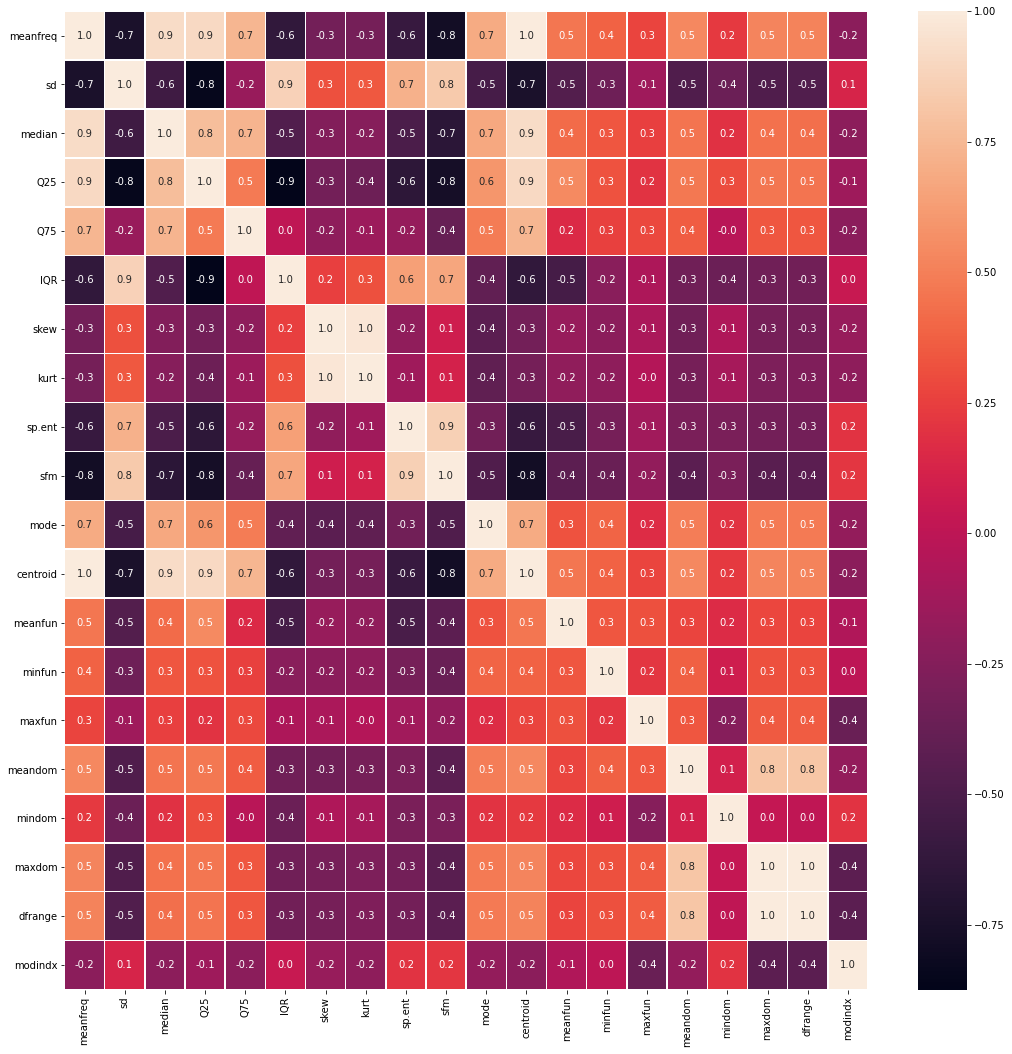

In [11]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(),annot=True,linewidth=.5, fmt='.1f')

In [12]:
result = pd.concat([X, y], axis=1)

In [13]:
result

meanfreq        sd    median       Q25       Q75       IQR      skew  \
0    -4.048609  0.427288 -4.224234 -2.575695 -5.692709 -0.214744  2.292944   
1    -3.840447  0.611573 -3.998662 -2.486492 -5.588105 -0.258445  4.547338   
2    -3.462520  1.603595 -4.095204 -2.706559 -3.928079  0.909182  6.512628   
3    -0.992001  0.899856 -0.759334 -0.901276 -0.711092  0.632590 -0.449787   
4    -1.530399  1.322352 -1.676683 -1.268195 -0.791904  1.005429 -0.480835   
...        ...       ...       ...       ...       ...       ...       ...   
3163 -1.638584  1.657920 -0.877700 -1.872868 -0.999220  1.578892 -0.324969   
3164 -2.162111  1.927378 -2.994010 -2.007778 -0.839888  1.820434 -0.576918   
3165 -1.298568  2.322357 -0.051965 -2.198692 -0.017120  2.492272 -0.297997   
3166 -1.245005  2.011878 -0.017726 -1.991538 -0.203989  2.153314 -0.365309   
3167 -0.514665  2.147312 -0.070868 -1.445861  1.102505  2.254315 -0.338434   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0     1.762668 -0.039077  0.471501  ... -4.048609 -1.811752 -1.097825   
1     4.432308 -0.065226  0.594337  ... -3.840447 -1.079424 -1.091360   
2     7.325050 -1.083559  0.398198  ... -3.462520 -1.365152 -1.100223   
3    -0.240061  1.516143  1.797056  ... -0.992001 -1.666703 -0.988777   
4    -0.238902  1.708067  2.114406  ... -1.530399 -1.127056 -1.033852   
...        ...       ...       ...  ...       ...       ...       ...   
3163 -0.221881  1.507511  1.999568  ... -1.638584  1.237689  2.443701   
3164 -0.252463  1.458188  1.697563  ... -2.162111  1.429306 -0.124517   
3165 -0.222073  1.150017  1.385638  ... -1.298568  2.077453  0.140706   
3166 -0.231086  1.229656  1.505473  ... -1.245005  0.915300 -0.120658   
3167 -0.228264  0.971606  1.088954  ... -0.514665  1.324902  1.324405   

        maxfun   meandom    mindom    maxdom   dfrange   modindx   label  
0     0.565869 -1.563958 -0.708292 -1.431196 -1.418913 -1.454543    male  
1    -0.293984 -1.561669 -0.708292 -1.417883 -1.405597 -1.013943    male  
2     0.410416 -1.563620 -0.708292 -1.428977 -1.416694 -1.065175    male  
3    -0.293984 -1.195178 -0.708292 -1.273666 -1.261333  0.614189    male  
4     0.260144 -0.221625 -0.708292  0.124135  0.136911  0.289001    male  
...        ...       ...       ...       ...       ...       ...     ...  
3163  0.114799  0.007023 -0.708292 -0.237518 -0.224857 -0.098973  female  
3164  0.565869  0.153549 -0.214608 -0.388392 -0.384656  0.871843  female  
3165  0.565869 -0.637732 -0.708292 -0.599172 -0.586625  0.175859  female  
3166 -0.293984 -0.072068 -0.708292 -0.412798 -0.400192  1.148980  female  
3167  0.410416 -1.146579 -0.708292 -1.275885 -1.263553  1.475446  female  

[3168 rows x 21 columns]

<AxesSubplot:>

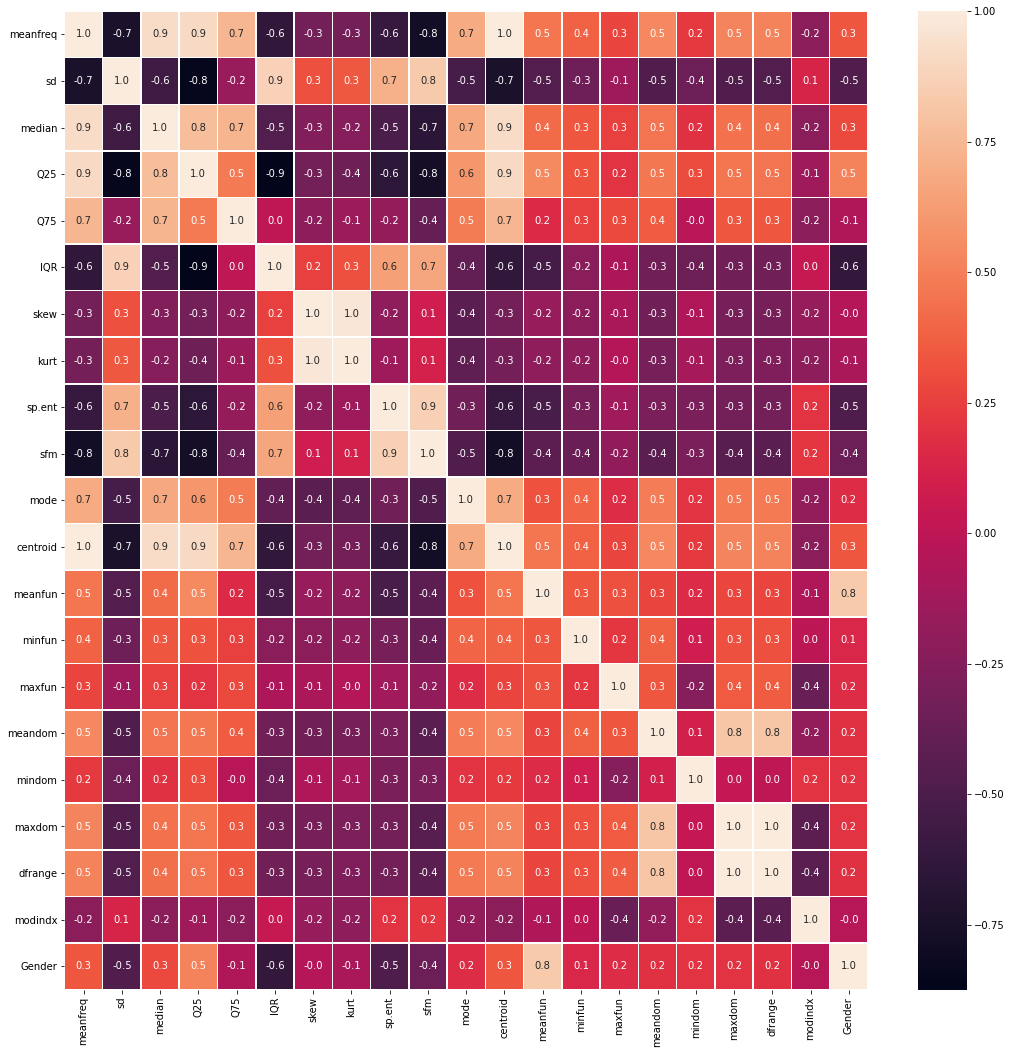

In [14]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(),annot=True,linewidth=.5, fmt='.1f')

Two most indicative features are IQR and meanfun , according to the Correlation Matrix

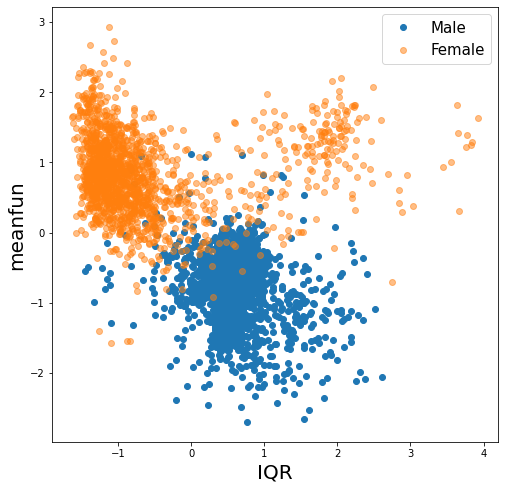

In [15]:
f, ax = plt.subplots(figsize=(8,8))

M = y=="male"
F = y=="female"

plt.plot(X["IQR"][M],X["meanfun"][M],'o',label="Male")

## We set alpha=.5 to try to avoid masking, but some points still will be burried. 
plt.plot(X["IQR"][F],X["meanfun"][F],'o',label="Female",alpha=.5)

plt.xlabel("IQR",fontsize=20)
plt.ylabel("meanfun",fontsize=20)
plt.legend(fontsize=15)

In [17]:
from sklearn.linear_model import LinearRegression

y_train = pd.get_dummies(y)

lr = LinearRegression()
lr.fit(X,y_train)

print("The r^2 score on the training data for all features is %.3f"%(lr.score(X,y_train),))

B0_all = lr.intercept_
B_all = lr.coef_

print("The Linear Coefficients:\n", B_all)
print("The Intercept:", B0_all)

X_train = X[['IQR',"meanfun"]]

lr = LinearRegression()
lr.fit(X_train,y_train)

print("The r^2 score on the training data for two highly indicative features is %.3f"%(lr.score(X_train,y_train),))

B0 = lr.intercept_
B = lr.coef_

print("The Linear Coefficients:\n", B)
print("The Intercept:", B0)

The r^2 score on the training data for all features is 0.805
The Linear Coefficients:
 [[-4.91973097e+09 -6.39426333e-02  4.22260672e-02  6.61866241e+11
  -3.21407798e+11  5.81693194e+11  1.36824184e-01 -6.31501129e-02
   2.64454693e-02  6.84161739e-02 -3.81555412e-02  4.91973097e+09
   4.00286539e-01 -5.66305928e-02 -2.16140247e-02  3.50761370e-02
   4.18920869e+07 -2.33032883e+09  2.32958926e+09 -3.25919769e-03]
 [ 4.91973097e+09  6.39426333e-02 -4.22260672e-02 -6.61866241e+11
   3.21407798e+11 -5.81693194e+11 -1.36824184e-01  6.31501129e-02
  -2.64454693e-02 -6.84161739e-02  3.81555412e-02 -4.91973097e+09
  -4.00286539e-01  5.66305928e-02  2.16140247e-02 -3.50761370e-02
  -4.18920869e+07  2.33032883e+09 -2.32958926e+09  3.25919769e-03]]
The Intercept: [0.49336358 0.50663642]
The r^2 score on the training data for two highly indicative features is 0.737
The Linear Coefficients:
 [[-0.12125969  0.35221767]
 [ 0.12125969 -0.35221767]]
The Intercept: [0.5 0.5]


(-2.9824061028118374, 3.2173047659064125)

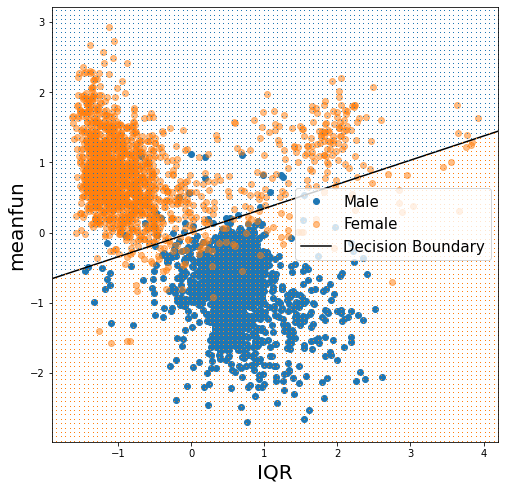

In [18]:
f, ax = plt.subplots(figsize=(8, 8))

X1 = X["IQR"]
X2 = X["meanfun"]

plt.plot(X1[M],X2[M],'o',label="Male")
plt.plot(X1[F],X2[F],'o',label="Female",alpha=.5)

xm,xM = plt.xlim()
ym,yM = plt.ylim()

u = np.linspace(xm,xM, 2)
v = (u*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])
plt.plot(u,v,label="Decision Boundary",color="black")


XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100)) 

z1 = YY >(XX*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])
z2 = YY <(XX*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")


plt.xlabel("IQR",fontsize=20)
plt.ylabel("meanfun",fontsize=20)
plt.legend(fontsize=15)

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

female  male
0          0     1
1          0     1
2          0     1
3          0     1
4          0     1
...      ...   ...
3163       1     0
3164       1     0
3165       1     0
3166       1     0
3167       1     0

[3168 rows x 2 columns]

(-2.9824061028118374, 3.2173047659064125)

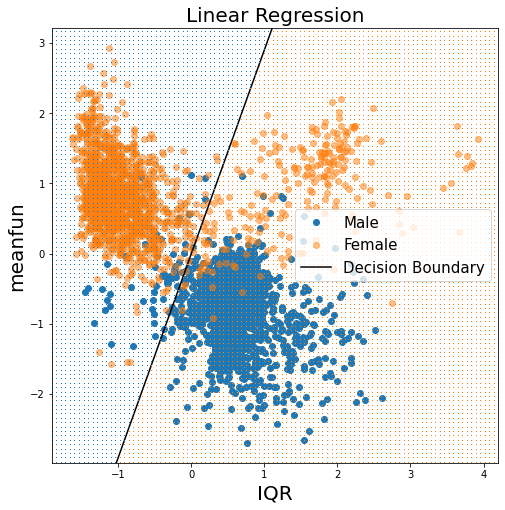

In [97]:
y_train = pd.get_dummies(y)
display(y_train)

from sklearn.linear_model import LinearRegression

X_train = X[['meanfun',"IQR"]]

lr = LinearRegression()
lr.fit(X_train,y_train)

B0 = lr.intercept_
B = lr.coef_


f, ax = plt.subplots(figsize=(8,8))

I_m = y=="male"
I_f = y=="female"

X1 = X["IQR"]
X2 = X["meanfun"]

plt.plot(X1[I_m],X2[I_m],'o',label="Male")
plt.plot(X1[I_f],X2[I_f],'o',label="Female",alpha=.5)


## We want to make a nice clean line directly across the graph as it was before
## The best way to do this is to find the limits of the graph and plot using them

xm,xM = plt.xlim()
ym,yM = plt.ylim()

u = np.linspace(xm,xM, 2)
v = (u*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])
plt.plot(u,v,label="Decision Boundary",color="black")


## We also may also want to color in the side of the decicion boundry we're
## Labeling each point. One way to do this is using a mesh grid, and then using
## an indexon the equation from before

XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100))

z1 = YY >(XX*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])
z2 = YY <(XX*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")

## We now reset the x and y limits to make sure our view is centered tightly
## around the data.

plt.xlabel("IQR",fontsize=20)
plt.ylabel("meanfun",fontsize=20)

plt.title("Linear Regression",fontsize=20)

plt.legend(fontsize=15)

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

Score for all features in QDA: 0.919
Score for Two highly indicative features in QDA: 0.966


C:\Users\Sunil\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


(-2.9824061028118374, 3.2173047659064125)

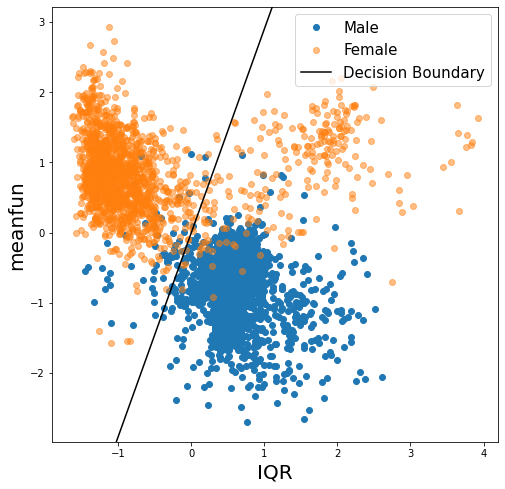

In [99]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True)

#Fitting all features in model
qda.fit(X, y)
print("Score for all features in QDA: %.3f"%qda.score(X,y))

#Fitting only two highly indicative features into model
qda.fit(X_train, y)
print("Score for Two highly indicative features in QDA: %.3f"%qda.score(X_train,y))

f, ax = plt.subplots(figsize=(8,8))

X1 = X["IQR"]
X2 = X["meanfun"]

plt.plot(X1[M],X2[M],'o',label="Male")
plt.plot(X1[F],X2[F],'o',label="Female",alpha=.5)

xm,xM = plt.xlim()
ym,yM = plt.ylim()

XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100)) 

grid=np.concatenate([XX.reshape(-1,1),YY.reshape(-1,1)],axis=1)

ZZ = qda.predict(grid).reshape(XX.shape)  
z1 = ZZ == 'M'
z2 = ZZ == 'F'

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")


plt.xlabel("IQR",fontsize=20)
plt.ylabel("meanfun",fontsize=20)
plt.plot(u,v,label="Decision Boundary",color="black")

plt.legend(fontsize=15)

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

Score for all features in LDA: 0.968
Score for two highly indicative features in LDA: 0.961


(-2.9824061028118374, 3.2173047659064125)

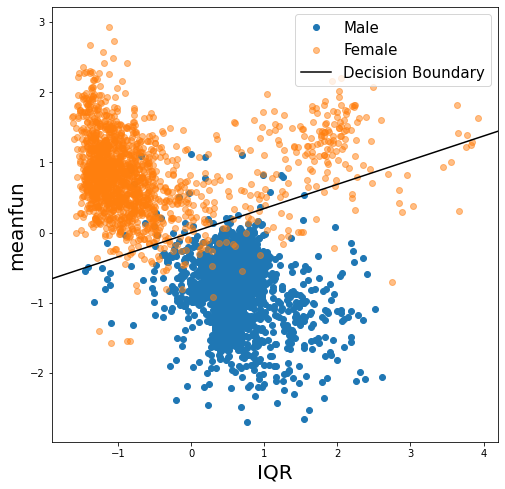

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(store_covariance=True)

#Fitting all features in model
lda.fit(X, y)
print("Score for all features in LDA: %.3f"%lda.score(X,y))

#Fitting only two highly indicative features into model
lda.fit(X_train, y)
print("Score for two highly indicative features in LDA: %.3f"%lda.score(X_train,y))

f, ax = plt.subplots(figsize=(8,8))

X1 = X["IQR"]
X2 = X["meanfun"]

plt.plot(X1[M],X2[M],'o',label="Male")
plt.plot(X1[F],X2[F],'o',label="Female",alpha=.5)


xm,xM = plt.xlim()
ym,yM = plt.ylim()

XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100)) 


grid=np.concatenate([XX.reshape(-1,1),YY.reshape(-1,1)],axis=1)

ZZ = qda.predict(grid).reshape(XX.shape)  ## We predict, and reshape back to the origional grid

z1 = ZZ == 'M'
z2 = ZZ == 'F'

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")

plt.plot(u,v,label="Decision Boundary",color="black")


plt.xlabel("IQR",fontsize=20)
plt.ylabel("meanfun",fontsize=20)
plt.legend(fontsize=15)

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

Score for all features in Logistic Regression: 0.975
Score for two highly indictive features in Logistic Regression: 0.966


(-2.9824061028118374, 3.2173047659064125)

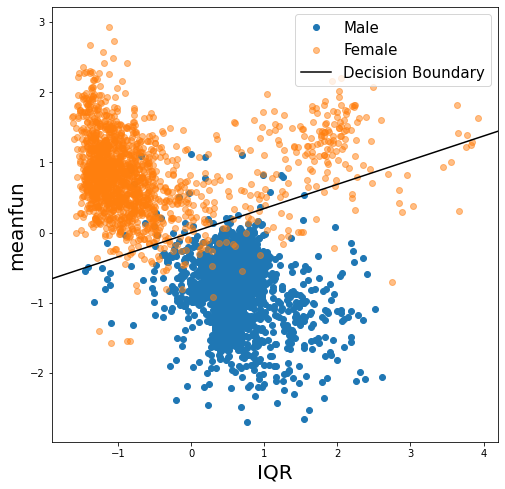

In [22]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

#Fitting all features into Model
clf.fit(X,y)
print("Score for all features in Logistic Regression: %.3f"%clf.score(X,y))

#Fitting only two features into model
clf.fit(X_train,y)
print("Score for two highly indictive features in Logistic Regression: %.3f"%clf.score(X_train,y))

f, ax = plt.subplots(figsize=(8,8))

X1 = X["IQR"]
X2 = X["meanfun"]

plt.plot(X1[M],X2[M],'o',label="Male")
plt.plot(X1[F],X2[F],'o',label="Female",alpha=.5)

xm,xM = plt.xlim()
ym,yM = plt.ylim()

XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100)) 


grid=np.concatenate([XX.reshape(-1,1),YY.reshape(-1,1)],axis=1)

ZZ = clf.predict(grid).reshape(XX.shape)  
z1 = ZZ == 'M'
z2 = ZZ == 'F'

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")

plt.plot(u,v,label="Decision Boundary",color="black")


plt.xlabel("IQR",fontsize=20)
plt.ylabel("meanfun",fontsize=20)
plt.legend(fontsize=15)

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

In [100]:
#Cross Validation

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X[["IQR","meanfun"]], y, test_size=0.2)

## Linear Regression Analysis

lr = LinearRegression()
lr.fit(X_train, pd.get_dummies(y_train))
y_hat = np.argmax(lr.predict(X_test), axis=1)
y_true = np.argmax(np.matrix(pd.get_dummies(y_test)), axis=1)
lr_2 = accuracy_score(y_hat,y_true)

## Linear Discriminant Analysis

lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train, y_train)
lda_2 = lda.score(X_test,y_test)

## Quadratic Discriminant Analysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y_train)
qda_2 = qda.score(X_test,y_test)

## Logisitic Regression

clf = LogisticRegression()
clf.fit(X_train,y_train)
clf_2 = clf.score(X_test,y_test)


#For All Features

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4)

## Linear Regression Analysis

lr2 = LinearRegression()
lr2.fit(X_train2, pd.get_dummies(y_train2))
y_hat = np.argmax(lr2.predict(X_test2), axis=1)
y_true = np.argmax(np.matrix(pd.get_dummies(y_test2)), axis=1)
lr_all = accuracy_score(y_hat,y_true)

## Linear Discriminant Analysis

lda2 = LinearDiscriminantAnalysis(store_covariance=True)
lda2.fit(X_train2, y_train2)
lda_all = lda2.score(X_test2,y_test2)

## Quadratic Discriminant Analysis

qda2 = QuadraticDiscriminantAnalysis(store_covariance=True)
qda2.fit(X_train2, y_train2)
qda_all = qda2.score(X_test2,y_test2)

## Logisitic Regression

clf2 = LogisticRegression()
clf2.fit(X_train2,y_train2)
clf_all = clf2.score(X_test2,y_test2)

print("Model Name \t All features \t Two features")
print("Linear Reg: \t {0:.3f} \t\t {1:.3f}".format(lr_all,lr_2)) 
print("Logistic Reg: \t {0:.3f} \t\t {1:.3f}".format(clf_all,clf_2))
print("LDA Score: \t {0:.3f} \t\t {1:.3f}".format(lda_all,lda_2))
print("QDA Score: \t {0:.3f} \t\t {1:.3f}".format(qda_all,qda_2))

Model Name 	 All features 	 Two features
Linear Reg: 	 0.972 		 0.970
Logistic Reg: 	 0.976 		 0.973
LDA Score: 	 0.972 		 0.970
QDA Score: 	 0.835 		 0.976


C:\Users\Sunil\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Violin,Box and Swarm plots 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'meanfreq'),
  Text(1, 0, 'sd'),
  Text(2, 0, 'median'),
  Text(3, 0, 'Q25'),
  Text(4, 0, 'Q75'),
  Text(5, 0, 'IQR'),
  Text(6, 0, 'skew'),
  Text(7, 0, 'kurt'),
  Text(8, 0, 'sp.ent'),
  Text(9, 0, 'sfm'),
  Text(10, 0, 'mode'),
  Text(11, 0, 'centroid'),
  Text(12, 0, 'meanfun'),
  Text(13, 0, 'minfun'),
  Text(14, 0, 'maxfun'),
  Text(15, 0, 'meandom'),
  Text(16, 0, 'mindom'),
  Text(17, 0, 'maxdom'),
  Text(18, 0, 'dfrange'),
  Text(19, 0, 'modindx')])

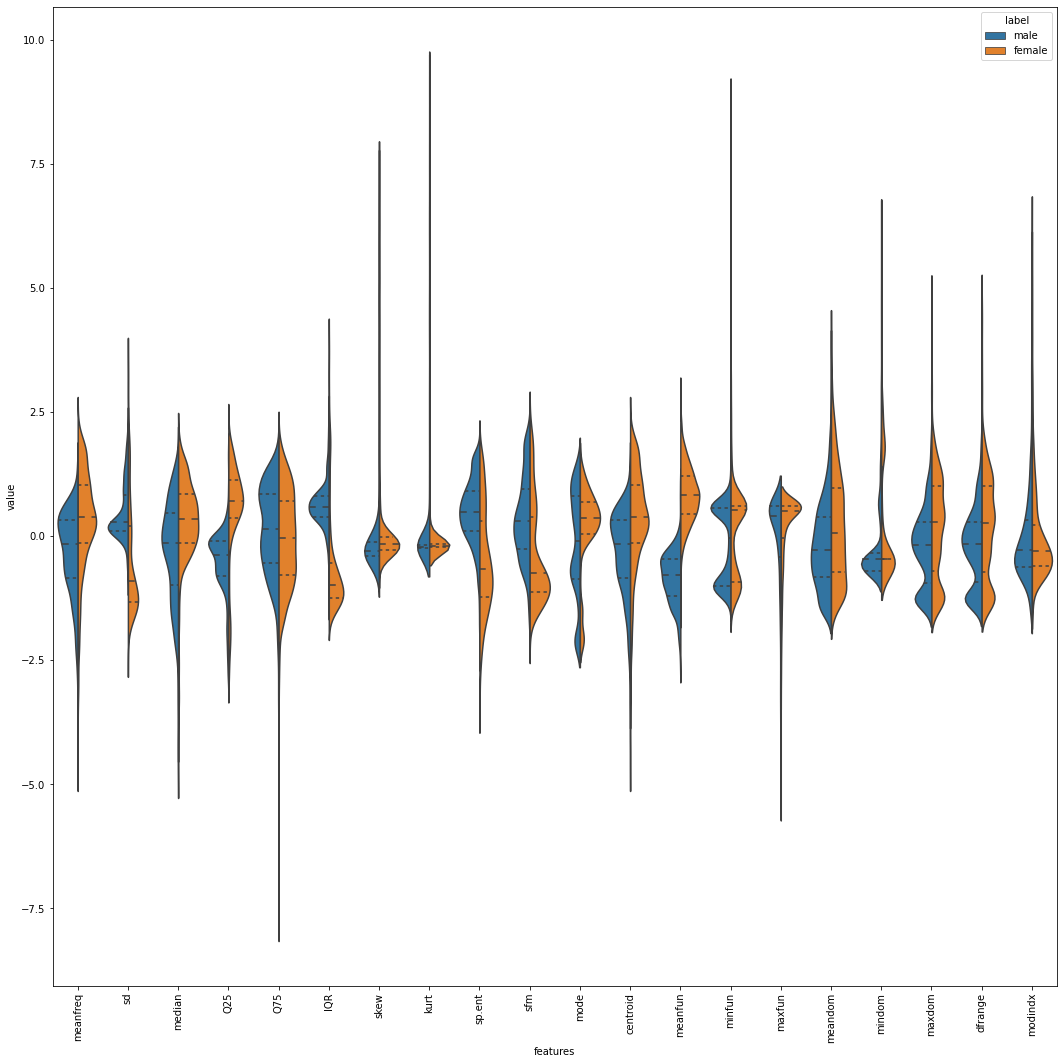

In [41]:
# plots 
plt.figure(figsize=(18,18))

vio = pd.concat([y,X],axis=1)
vio = pd.melt(vio,id_vars="label",
                    var_name="features",
                    value_name='value')

sns.violinplot(x="features", y="value", hue="label", data=vio,split=True, inner="quart")

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'meanfreq'),
  Text(1, 0, 'sd'),
  Text(2, 0, 'median'),
  Text(3, 0, 'Q25'),
  Text(4, 0, 'Q75'),
  Text(5, 0, 'IQR'),
  Text(6, 0, 'skew'),
  Text(7, 0, 'kurt'),
  Text(8, 0, 'sp.ent'),
  Text(9, 0, 'sfm'),
  Text(10, 0, 'mode'),
  Text(11, 0, 'centroid'),
  Text(12, 0, 'meanfun'),
  Text(13, 0, 'minfun'),
  Text(14, 0, 'maxfun'),
  Text(15, 0, 'meandom'),
  Text(16, 0, 'mindom'),
  Text(17, 0, 'maxdom'),
  Text(18, 0, 'dfrange'),
  Text(19, 0, 'modindx')])

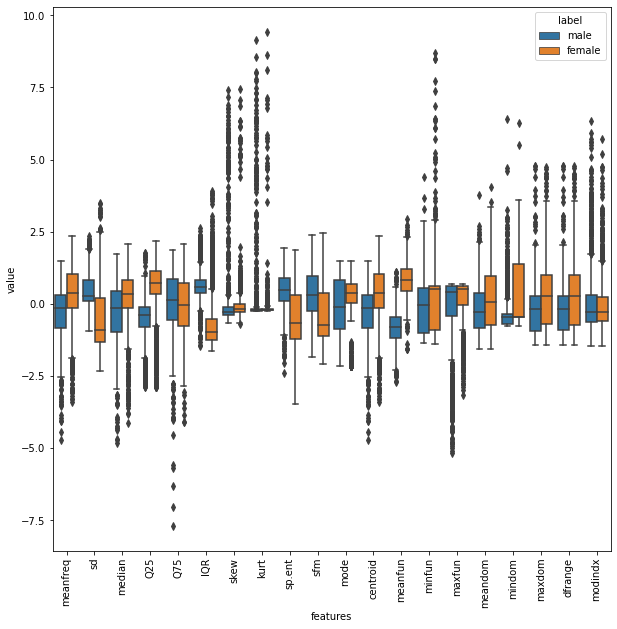

In [42]:
plt.figure(figsize=(10,10))

sns.boxplot(x="features", y="value", hue="label", data=vio)

plt.xticks(rotation=90)

C:\Users\Sunil\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sunil\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sunil\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sunil\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sunil\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.3% of the points 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'meanfreq'),
  Text(1, 0, 'sd'),
  Text(2, 0, 'median'),
  Text(3, 0, 'Q25'),
  Text(4, 0, 'Q75'),
  Text(5, 0, 'IQR'),
  Text(6, 0, 'skew'),
  Text(7, 0, 'kurt'),
  Text(8, 0, 'sp.ent'),
  Text(9, 0, 'sfm'),
  Text(10, 0, 'mode'),
  Text(11, 0, 'centroid'),
  Text(12, 0, 'meanfun'),
  Text(13, 0, 'minfun'),
  Text(14, 0, 'maxfun'),
  Text(15, 0, 'meandom'),
  Text(16, 0, 'mindom'),
  Text(17, 0, 'maxdom'),
  Text(18, 0, 'dfrange'),
  Text(19, 0, 'modindx')])

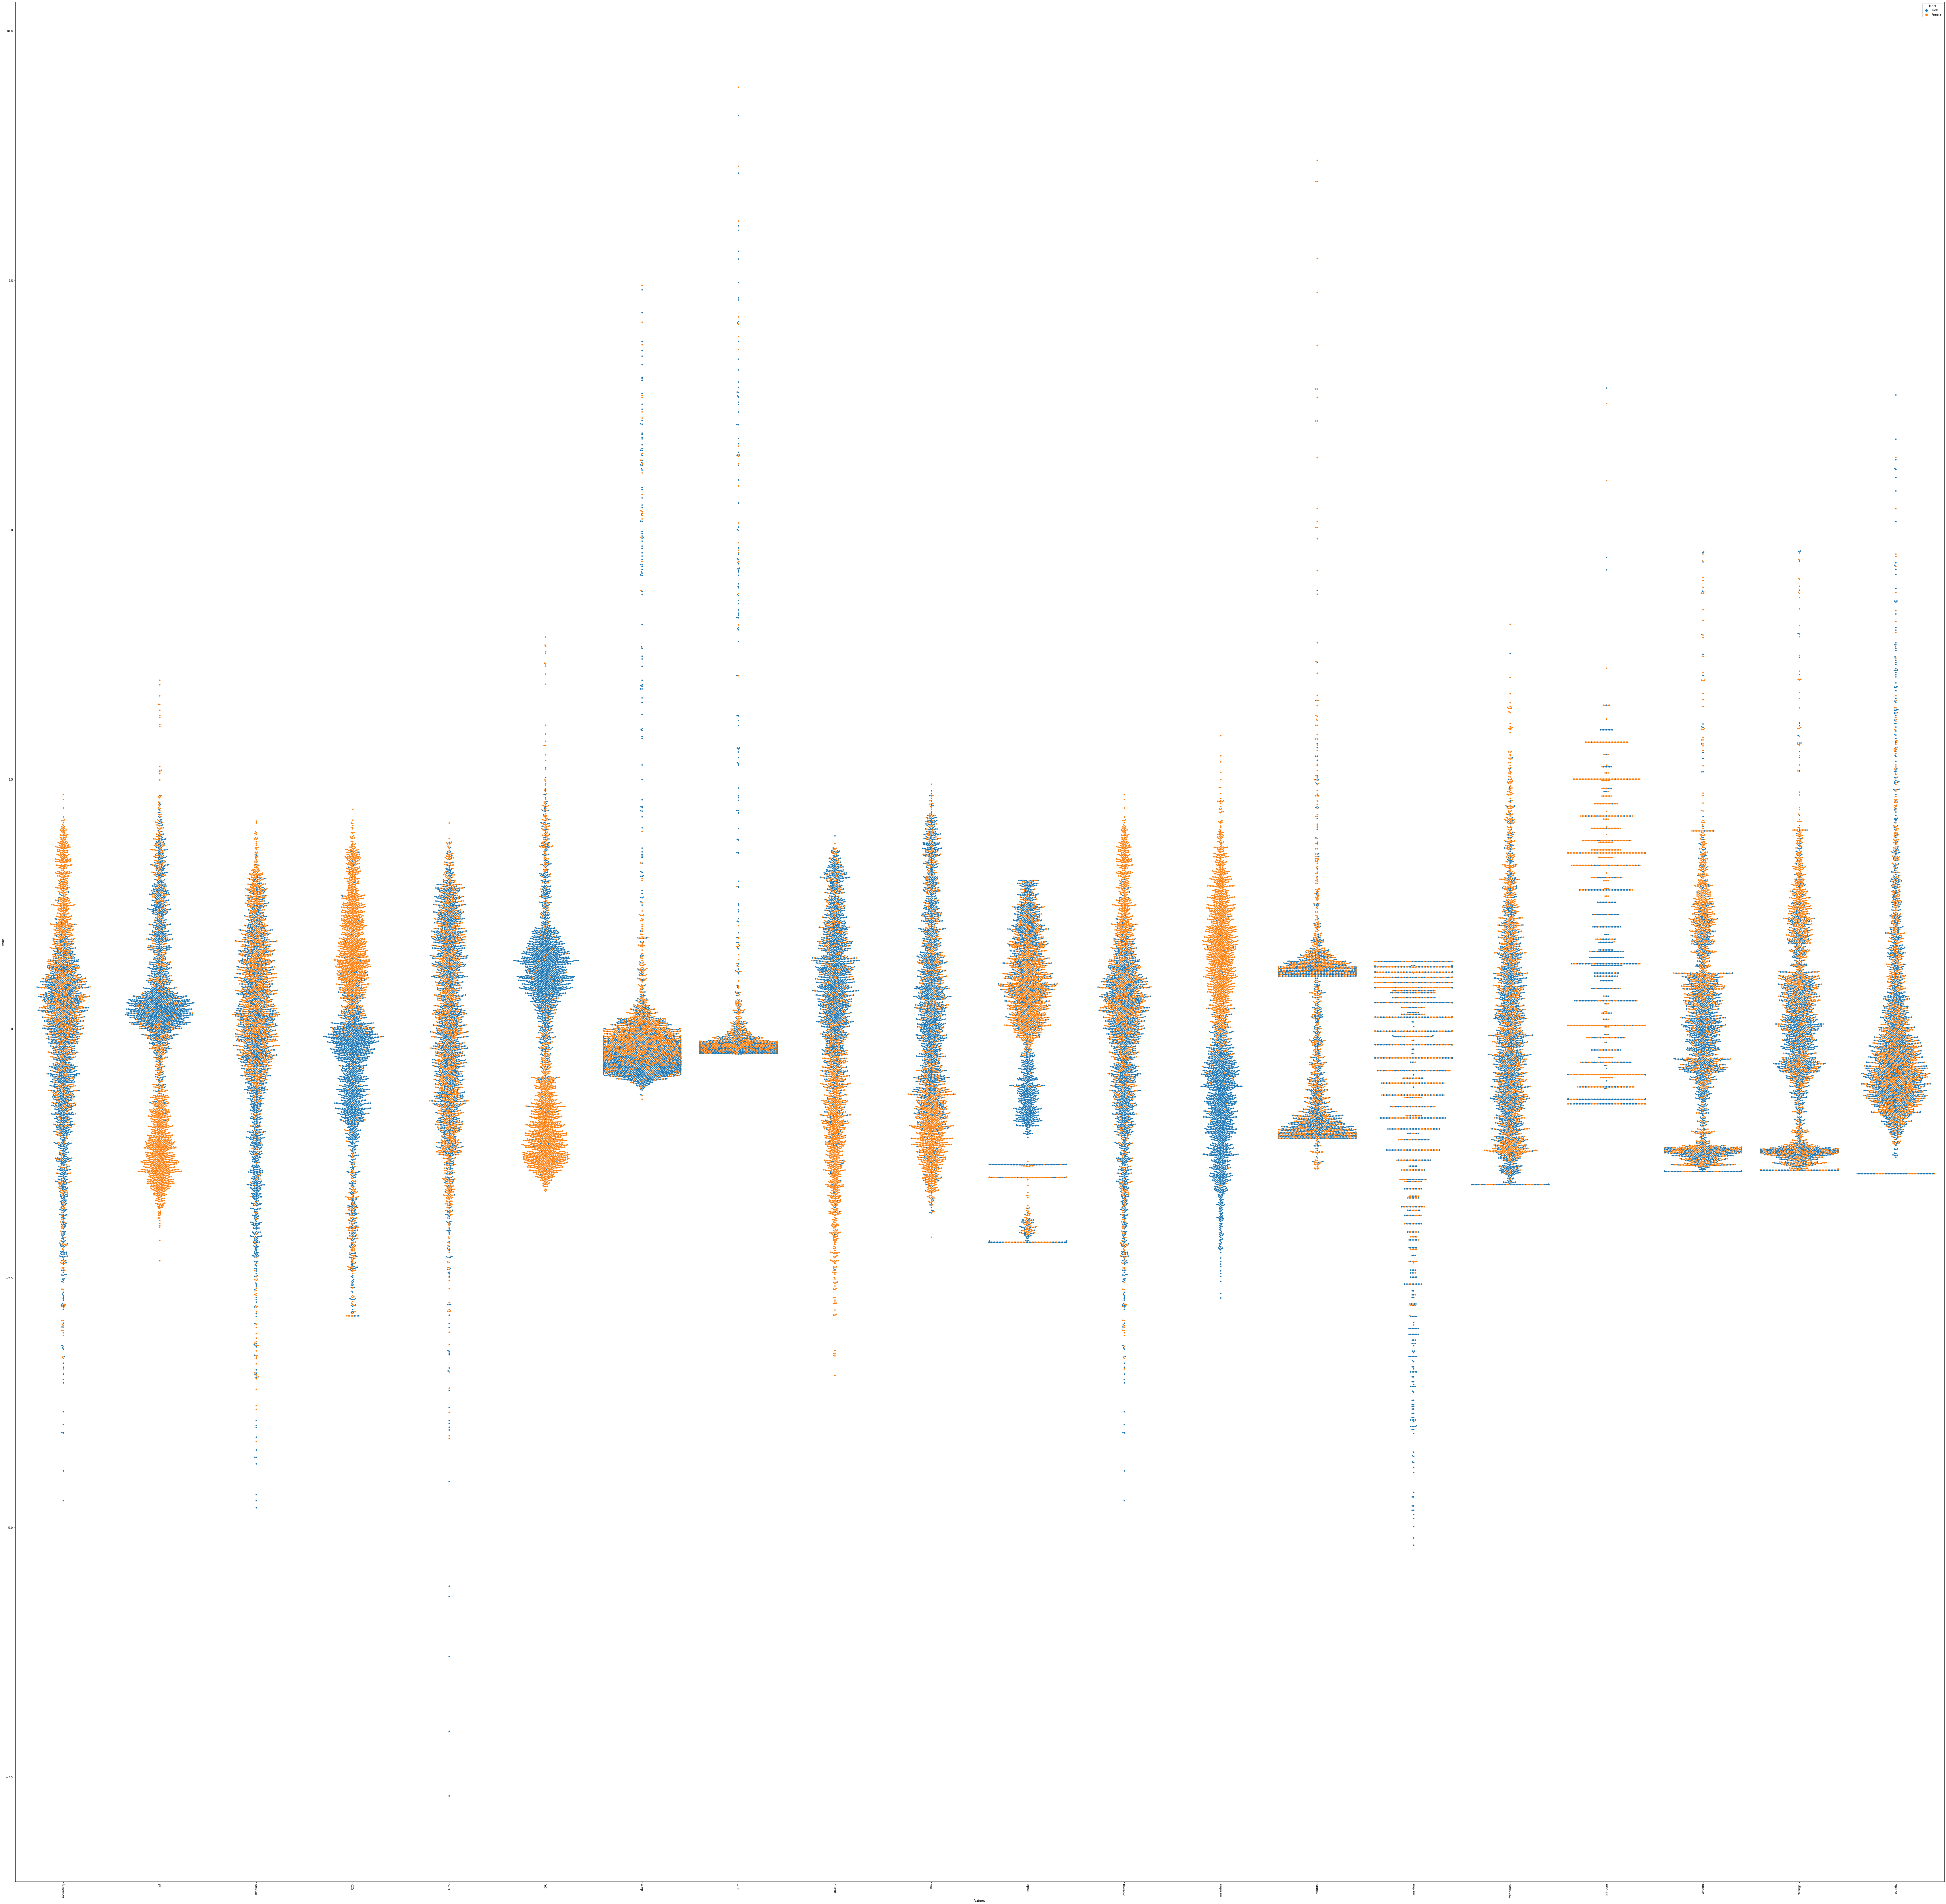

In [43]:
plt.figure(figsize=(120,120)) 
sns.swarmplot(x="features", y="value", hue="label", data=vio)
plt.xticks(rotation=90)

# Problem 2: MRI Data

The dementia level for the Oasis 1 MRI dataset is based on a patient assessment. As a result, it is not clear whether the levels of 0, .5, 1 and 2 should actually be understood as meaningfully numeric, or if they in fact are categorical labels. 

In this problem we want to treat them as categorical. However, we would also like to construct a slightly larger dataset, as we have seen that for images our 700 may not be sufficient. To construct a larger dataset we will again down sample the images, however this time we will use the down sampling to expand the dataset instead of throwing data away. After fixing a down sample rate $D$, we will construct one image out of the pixels $nD$, for $n = 1,2,\ldots, $. We will also construct $n D+i$, for $i = 1,\ldots, D$. This way, by down sampling with a rate $D$, we construct $D$ more pictures. 

__Note:__ It is very import that we perform the train test split _before_ we expand the dataset through down sampling. If not, we are effectively training on the test data. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

file_dir = 'D:/Users/Sunil/MRI_Images-1 (1)/MRI_Images/'
#labels_dir=r'D:\Users\Sunil\MRI_Images-1 (1)\MRI_Images\labels-1.csv'
labels = pd.read_csv(file_dir + 'labels-1.csv')
display(labels)
y_new = labels.CDR #what is this CDR?

Unnamed: 0               Filename             ID M/F Hand  Age  Educ  \
0             0   OAS1_0001_MR1_55.png  OAS1_0001_MR1   F    R   74     2   
1             1  OAS1_0001_MR1_120.png  OAS1_0001_MR1   F    R   74     2   
2             2  OAS1_0001_MR1_180.png  OAS1_0001_MR1   F    R   74     2   
3             3   OAS1_0002_MR1_55.png  OAS1_0002_MR1   F    R   55     4   
4             4  OAS1_0002_MR1_120.png  OAS1_0002_MR1   F    R   55     4   
..          ...                    ...            ...  ..  ...  ...   ...   
604         604  OAS1_0449_MR1_120.png  OAS1_0449_MR1   F    R   71     3   
605         605  OAS1_0449_MR1_180.png  OAS1_0449_MR1   F    R   71     3   
606         606   OAS1_0456_MR1_55.png  OAS1_0456_MR1   M    R   61     5   
607         607  OAS1_0456_MR1_120.png  OAS1_0456_MR1   M    R   61     5   
608         608  OAS1_0456_MR1_180.png  OAS1_0456_MR1   M    R   61     5   

     SES  MMSE  CDR  eTIV   nWBV    ASF  Delay  Slice  
0    3.0    29  0.0  1344  0.743  1.306    NaN     55  
1    3.0    29  0.0  1344  0.743  1.306    NaN    120  
2    3.0    29  0.0  1344  0.743  1.306    NaN    180  
3    1.0    29  0.0  1147  0.810  1.531    NaN     55  
4    1.0    29  0.0  1147  0.810  1.531    NaN    120  
..   ...   ...  ...   ...    ...    ...    ...    ...  
604  4.0    29  0.0  1264  0.818  1.388    NaN    120  
605  4.0    29  0.0  1264  0.818  1.388    NaN    180  
606  2.0    30  0.0  1637  0.780  1.072    NaN     55  
607  2.0    30  0.0  1637  0.780  1.072    NaN    120  
608  2.0    30  0.0  1637  0.780  1.072    NaN    180  

[609 rows x 15 columns]

In [2]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  609 non-null    int64  
 1   Filename    609 non-null    object 
 2   ID          609 non-null    object 
 3   M/F         609 non-null    object 
 4   Hand        609 non-null    object 
 5   Age         609 non-null    int64  
 6   Educ        609 non-null    int64  
 7   SES         561 non-null    float64
 8   MMSE        609 non-null    int64  
 9   CDR         609 non-null    float64
 10  eTIV        609 non-null    int64  
 11  nWBV        609 non-null    float64
 12  ASF         609 non-null    float64
 13  Delay       0 non-null      float64
 14  Slice       609 non-null    int64  
dtypes: float64(5), int64(6), object(4)
memory usage: 71.5+ KB


In [3]:
y_new.max()

2.0

In [4]:
labels.size

9135

In [5]:
data_1 = np.zeros([609, 30976])

for n, file_name in enumerate(labels.Filename):
    data_1[n,:] = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)

In [6]:
from sklearn.model_selection import train_test_split

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(data_1, y_new, test_size=0.2, random_state=0)
print(y_train_new.shape, y_test_new.shape)

(487,) (122,)


In [8]:
len(X_train_new)

487

In [10]:
data_1

array([[0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       [0.40882355, 0.41176471, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       [0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       ...,
       [0.42352942, 0.43333334, 0.44705883, ..., 0.40000001, 0.40000001,
        0.40000001],
       [0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       [0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001]])

In [9]:
len(X_test_new)

122

We want to sample the data array using the `data[start:stop:step]` slice paradigm. This means we are taking elements of the array `data` starting at `start`, ending at `stop` with step `step`. This is why previously `data[::DS]` down sampled at a rate of DS. For example, 

    lst = list(range(165)); lst[6::10]
    
returns

    [6, 16, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116, 126, 136, 146, 156]

We need to create two new arrays, one of shape $[561\times DS, 30976/DS]$ containing the down sampled data, and one of shape $[561\times DS]$ containing the labels. The for each of the $N_{train}$ images in the training array, we need to create $DS$ new down sampled images, with the downsample starting from $i$:

`Xds_train[n+i, :] = X_train[i::DS]`

This will split our images into DS down sampled images. We then need to be sure to save out the appropriate label:

In [10]:
DS = 8             # Downsample rate, must be a multiple of 30976

N_train = y_train_new.shape[0]  # The length of the training data

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)

Xds_train = np.zeros([N_train*DS, im_size])
yds_train = np.zeros(N_train*DS)
    
for n in range(N_train):
    for i in range(DS):
        Xds_train[n+i,:] = X_train_new[n,i::DS]
        yds_train[n+i] = y_new[n]
        
print(Xds_train.shape)
print(yds_train.shape)
print(N_train)


(3896, 3872)
(3896,)
487


In [11]:
N_train = y_train_new.shape[0]

In [12]:
N_train

487

In [13]:
N_train

487

In [14]:
Xds_train

array([[0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       [0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       [0.42745098, 0.41470587, 0.43039215, ..., 0.40000001, 0.40000001,
        0.40000001],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Question 1:

Based on the code above, downsample the test data in the same way.  ()

In [15]:
 DS = 8            # Downsample rate, must be a multiple of 30976

N_test= y_test_new.shape[0]  # The length of the testing data data

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)



In [16]:
Xds_test = np.zeros([N_test*DS, im_size])
yds_test = np.zeros(N_test*DS)
    


In [17]:
N_test

122

In [18]:
im_size

3872

In [19]:
Xds_test.shape

(976, 3872)

In [20]:
for n in range(N_test):
    for i in range(DS):
        Xds_test[n+i,:] = X_test_new[n,i::DS]
        yds_test[n+i] = y_new[n]
        
print(Xds_test.shape)
print(yds_test.shape)

(976, 3872)
(976,)


In [21]:
yds_test

array([0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 1. , 1. , 0. , 0. , 0. ,
       1. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. , 1. , 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0.5, 0.5, 0.5, 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0. , 0. , 0.5, 0.5, 0.5,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.5, 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 1. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.

### Question 2:

Perform LDA, QDA, Logistic Regression and Categorical Linear Regression on the down sampled Oasis 1 dataset. How do these compare to linear regression?

In [22]:
Xds_train

array([[0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       [0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       [0.42745098, 0.41470587, 0.43039215, ..., 0.40000001, 0.40000001,
        0.40000001],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [23]:
Xds_test

array([[0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       [0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       [0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(Xds_train, yds_train.astype('str'))
print("LDA Score: %.3f"%lda.score(Xds_test,yds_test.astype('str')))

LDA Score: 0.926


In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(Xds_train, yds_train.astype('str'))
print("QDA Score: %.3f"%qda.score(Xds_test,yds_test.astype('str')))

C:\Users\Sunil\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA Score: 0.886


In [26]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(Xds_train, yds_train.astype('str'))

print("Logistic Regression Score: %.3f"%clf.score(Xds_test,yds_test.astype('str')))

Logistic Regression Score: 0.941


C:\Users\Sunil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
pd.get_dummies(yds_train)

0.0  0.5  1.0  2.0
0       1    0    0    0
1       1    0    0    0
2       1    0    0    0
3       1    0    0    0
4       1    0    0    0
...   ...  ...  ...  ...
3891    1    0    0    0
3892    1    0    0    0
3893    1    0    0    0
3894    1    0    0    0
3895    1    0    0    0

[3896 rows x 4 columns]

In [28]:
len(Xds_train)

3896

In [29]:
Xds_test

array([[0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       [0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       [0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xds_train, pd.get_dummies(yds_train))
y_hat = np.argmax(lr.predict(Xds_test), axis=1)
y_true = np.argmax(np.matrix(pd.get_dummies(yds_test)), axis=1)
lr_2 = accuracy_score(y_hat,y_true)


In [34]:
lr_2

0.9262295081967213

In [44]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_true, y_hat)
conf_mx

array([[891,  28,   6,   0],
       [ 16,  11,   3,   0],
       [ 12,   6,   2,   1],
       [  0,   0,   0,   0]], dtype=int64)

The test accuracy of Categorical Linear Regression 92.623 ,  using Logistic Regression we got 94.1 and LDA is 92.6 ,whereas the test accuracy for QDA is 88.6. So in comparison Logistic Regression seems to have the highest score. Compared to Linear Regression Logistic seems to be the better one , LDA have similar values for the score as Linear Regression but when it comes to QDA and Linear Regression, Linear Regression performs better 

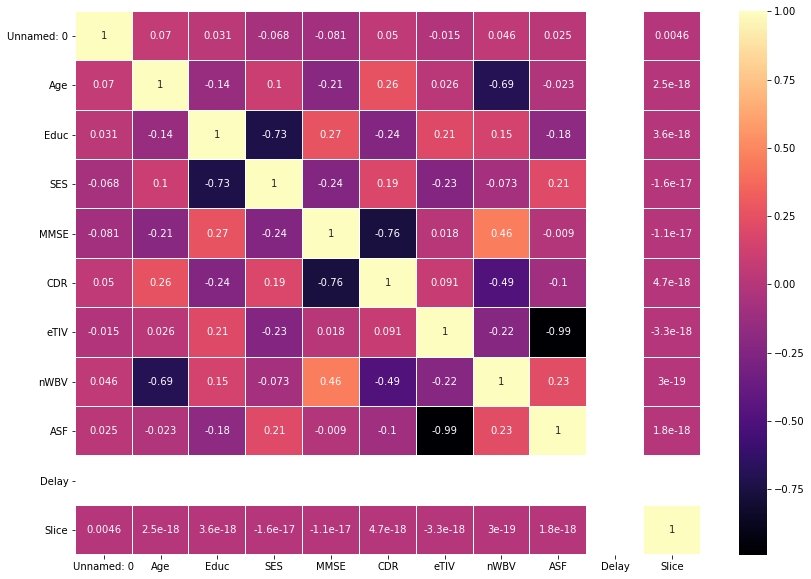

In [111]:
fig,ax = plt.subplots(figsize=(14, 10))

sns.heatmap(labels.corr(), ax=ax, annot = True, linewidths=0.05,cmap="magma")
plt.show()
